#Machine Learning Algorithms for beginners #2 :

---

Supervised ML with Categorical Variables

## Niranjan Meegammana
### Cyber Security Research
### Sri Lanka Institute of Information Technology
### Shilpa Sayura Foundation

Tutorial
https://cy-sec-research.blogspot.com/2023/07/c-ategorycal-variables-categorical.html

A categorical target variable is a dependent variable. it includes discrete values or categories, representing qualitative data, such as different classes, groups, or labels.

eg. "Yes" or "No," multi-class labels like "Low," "Medium," or "High," or nominal categories like "Red," "Blue," or "Green."

In [ ]:
import pandas as pd

# The JSON data
json_data = '''
{
  "data": [
    {
      "Fruit": "Apple",
      "Size": "Small",
      "Weight": "120g",
      "Shape": "Round",
      "Color": "Red"
    },
    {
      "Fruit": "Banana",
      "Size": "Small",
      "Weight": "150g",
      "Shape": "Curved",
      "Color": "Yellow"
    },
    {
      "Fruit": "Grape",
      "Size": "Tiny",
      "Weight": "5g",
      "Shape": "Round",
      "Color": "Green"
    },
    {
      "Fruit": "Blueberry",
      "Size": "Tiny",
      "Weight": "1g",
      "Shape": "Round",
      "Color": "Blue"
    },
    {
      "Fruit": "Orange",
      "Size": "Medium",
      "Weight": "200g",
      "Shape": "Round",
      "Color": "Orange"
    }
  ]
}
'''

# Convert JSON to DataFrame
df = pd.read_json(json_data, orient='split')

# Save DataFrame to CSV file
csv_file = 'fruits_data.csv'
df.to_csv(csv_file, index=False)

# Read CSV file back into a DataFrame
df_from_csv = pd.read_csv(csv_file)


# Display the DataFrame
print(df_from_csv)


       Fruit    Size Weight   Shape   Color
0      Apple   Small   120g   Round     Red
1     Banana   Small   150g  Curved  Yellow
2      Grape    Tiny     5g   Round   Green
3  Blueberry    Tiny     1g   Round    Blue
4     Orange  Medium   200g   Round  Orange


In [ ]:
import pandas as pd

# The JSON data
json_data = '''
{
  "data": [
    {
      "Fruit": "Apple",
      "Size": "Small",
      "Weight": "120g",
      "Shape": "Round",
      "Color": "Red"
    },
    {
      "Fruit": "Banana",
      "Size": "Small",
      "Weight": "150g",
      "Shape": "Curved",
      "Color": "Yellow"
    },
    {
      "Fruit": "Grape",
      "Size": "Tiny",
      "Weight": "5g",
      "Shape": "Round",
      "Color": "Green"
    },
    {
      "Fruit": "Blueberry",
      "Size": "Tiny",
      "Weight": "1g",
      "Shape": "Round",
      "Color": "Blue"
    },
    {
      "Fruit": "Orange",
      "Size": "Medium",
      "Weight": "200g",
      "Shape": "Round",
      "Color": "Orange"
    }
  ]
}
'''

# Convert JSON to DataFrame
df = pd.read_json(json_data, orient='split')

# Increase the data set 10 times by concatenating the dataframe
df_expanded = pd.concat([df] * 10, ignore_index=True)

# Save the expanded dataset to a CSV file
csv_file = 'expanded_fruits_data.csv'
df_expanded.to_csv(csv_file, index=False)

# Read CSV file back into a DataFrame
df_from_csv = pd.read_csv(csv_file)

# Display the DataFrame
print(df_from_csv)


        Fruit    Size Weight   Shape   Color
0       Apple   Small   120g   Round     Red
1      Banana   Small   150g  Curved  Yellow
2       Grape    Tiny     5g   Round   Green
3   Blueberry    Tiny     1g   Round    Blue
4      Orange  Medium   200g   Round  Orange
5       Apple   Small   120g   Round     Red
6      Banana   Small   150g  Curved  Yellow
7       Grape    Tiny     5g   Round   Green
8   Blueberry    Tiny     1g   Round    Blue
9      Orange  Medium   200g   Round  Orange
10      Apple   Small   120g   Round     Red
11     Banana   Small   150g  Curved  Yellow
12      Grape    Tiny     5g   Round   Green
13  Blueberry    Tiny     1g   Round    Blue
14     Orange  Medium   200g   Round  Orange
15      Apple   Small   120g   Round     Red
16     Banana   Small   150g  Curved  Yellow
17      Grape    Tiny     5g   Round   Green
18  Blueberry    Tiny     1g   Round    Blue
19     Orange  Medium   200g   Round  Orange
20      Apple   Small   120g   Round     Red
21     Ban

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('fruits_data.csv')

# Preprocess the 'Weight' column and convert it to numerical format
df['Weight'] = df['Weight'].str.replace('g', '').astype(float)

# Encode the categorical variables (Color, Size, and Shape)
df_encoded = pd.get_dummies(df, columns=['Color', 'Size', 'Shape'], drop_first=True)

# Separate the features (X) and the target variable (y)
X = df_encoded.drop(columns=['Fruit'])
y = df_encoded['Fruit']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Logistic Regression Model with multinomial (softmax) strategy
logreg_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg_model.fit(X_train, y_train)

# Save the trained Logistic Regression model to a file
model_file = 'logreg_model.pkl'
joblib.dump(logreg_model, model_file)
print(f"Model saved to {model_file}")


Model saved to logreg_model.pkl


In [ ]:
import pandas as pd
import joblib

# Load the trained Logistic Regression model from the saved file
model_file = 'logreg_model.pkl'
logreg_model = joblib.load(model_file)

# Define a sample dataset with real-world-like data for 5 fruits
data = {
    'Weight': [140, 80, 200, 60, 180],
    'Color': ['Red', 'Yellow', 'Orange', 'Green', 'Red'],
    'Size': ['Medium', 'Small', 'Large', 'Small', 'Medium'],
    'Shape': ['Round', 'Curved', 'Round', 'Round', 'Round'],
}

# Convert the sample dataset to a Pandas DataFrame
df_sample = pd.DataFrame(data)

# Encode the categorical variables (Color, Size, and Shape)
df_encoded = pd.get_dummies(df_sample, columns=['Color', 'Size', 'Shape'], drop_first=True)

# Reorder the columns to match the model's feature order
# Add missing columns with zeros if necessary
expected_columns = set(logreg_model.classes_)
missing_columns = expected_columns - set(df_encoded.columns)
for column in missing_columns:
    df_encoded[column] = 0

# Ensure the sample data has the same columns as the training data
df_encoded = df_encoded[logreg_model.classes_]

# Use the model to predict the class labels for the sample data
predictions = logreg_model.predict(df_encoded)

# Add the predicted fruit labels to the sample dataset
df_sample['Predicted_Fruit'] = predictions

# Display the predictions for the 5 fruits
print(df_sample)


ValueError: ignored

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


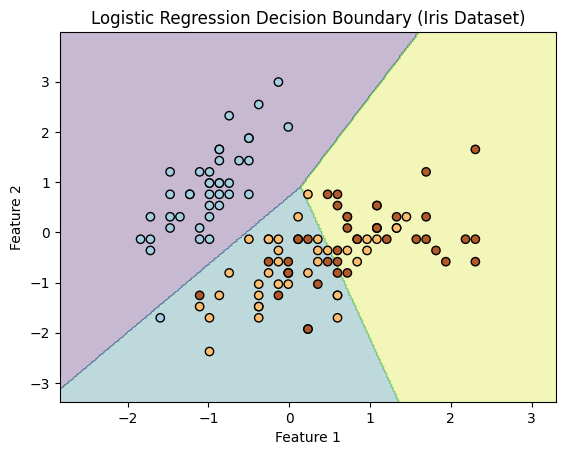

Model saved to logistic_regression_model.joblib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the decision boundary (only for 2 features)
X_train_2d = X_train_scaled[:, :2]
logistic_model_2d = LogisticRegression(random_state=42)
logistic_model_2d.fit(X_train_2d, y_train)

x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = logistic_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Iris Dataset)')
plt.show()

# Save the model to a file
model_filename = 'logistic_regression_model.joblib'
joblib.dump(logistic_model, model_filename)
print(f"Model saved to {model_filename}")


## Build a model

For supervised learning with a categorical target variable used in  image recognition and classification  like tasks, you can use various algorithms, depending on the nature of your data and the specific problem you are trying to solve.


## Logistic Regression
A simple and interpretable algorithm suitable for binary classification tasks.



Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]


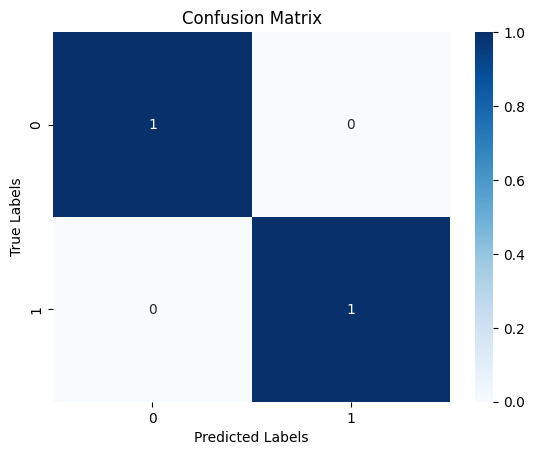

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

# Sample data with three classes
X = np.array([[1.2], [2.4], [3.1], [4.8], [5.0], [6.5], [2.0], [3.5], [4.0]])
y = np.array([0, 0, 1, 1, 1, 2, 0, 1, 2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualization of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


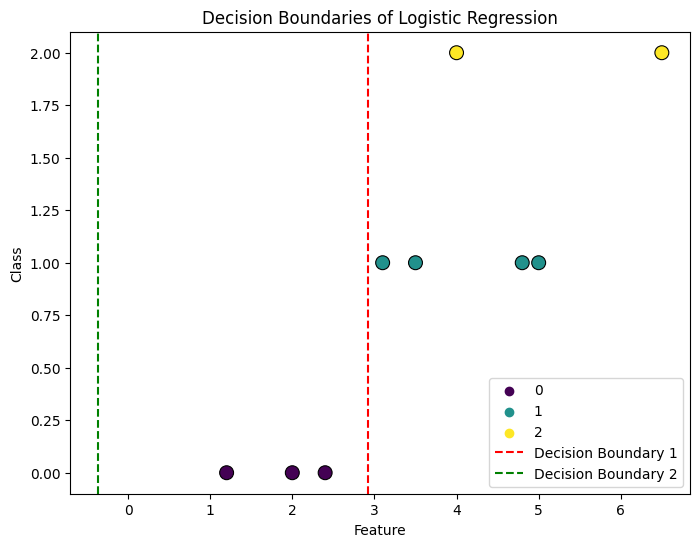

In [ ]:
#Visualization of the decision boundaries
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=y, hue=y, palette='viridis', s=100, edgecolor='k', legend='full')
plt.xlabel("Feature")
plt.ylabel("Class")
plt.title("Decision Boundaries of Logistic Regression")
plt.axvline(x=model.intercept_[0], color='r', linestyle='--', label="Decision Boundary 1")
plt.axvline(x=model.intercept_[1], color='g', linestyle='--', label="Decision Boundary 2")
plt.legend()
plt.show()





##Support Vector Machines (SVM):
Effective for binary or multi-class classification tasks, especially when dealing with high-dimensional data



to display the decision boundaries of the SVM model, we need to reduce the feature space to 2 dimensions. We can use Principal Component Analysis (PCA) to do this.

* ### note :
here we use the reduced feature space (2-dimensional) for plotting the decision boundaries, but the SVM model is expecting the original feature space (20-dimensional) as input during training and prediction.

Accuracy: 0.8


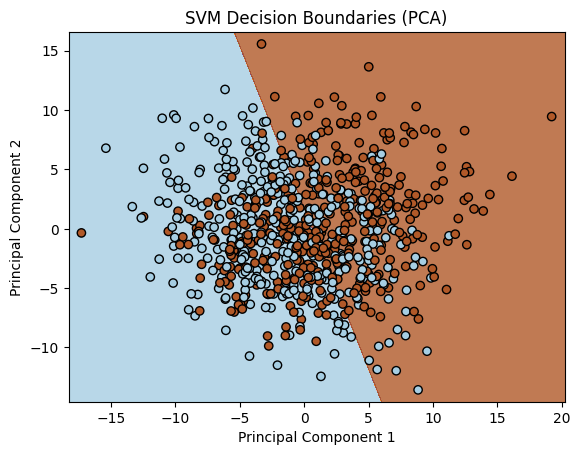

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Generate synthetic data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
model = SVC(kernel='linear')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Reduce feature space to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a meshgrid to plot decision boundaries in 2D
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use PCA-transformed data to get decision boundaries
Z = model.predict(np.c_[pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])])

# Plot decision boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot training points in 2D space
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundaries (PCA)')
plt.show()


## Random Forest: A powerful ensemble learning method that can handle both binary and multi-class classification tasks while being robust to overfitting.


An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

Accuracy: 1.0
Confusion Matrix:
[[20  0]
 [ 0 10]]


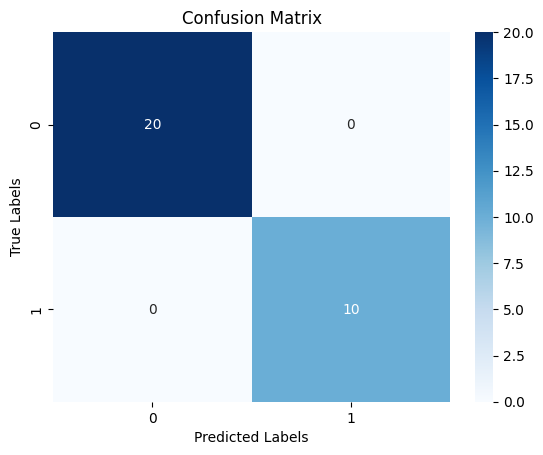

AUC: 1.0


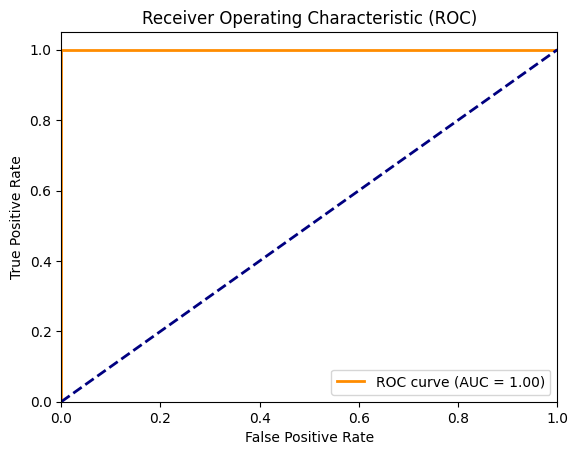

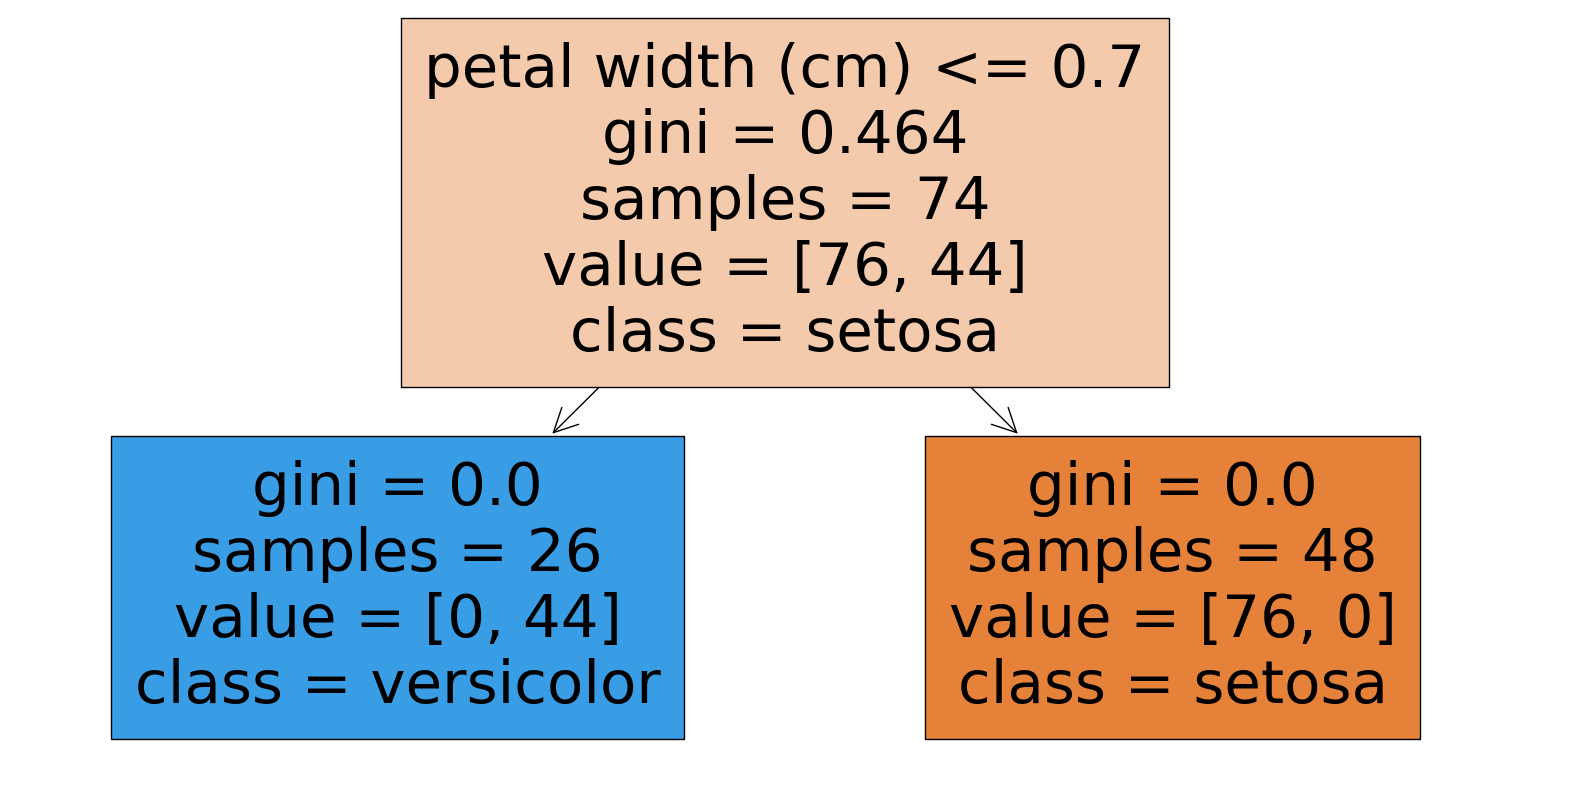

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import plot_tree

# Load the Iris dataset (binary classification)
data = load_iris()
X, y = data.data, data.target
y_binary = [1 if label == 0 else 0 for label in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Define the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualization of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC:", roc_auc)

# Visualization of the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

## Gradient Boosting Machines (GBM):
XGBoost or LightGBM, are powerful ensemble methods that often perform well on structured data with complex relationships.


Accuracy: 0.49
ROC AUC: 0.49


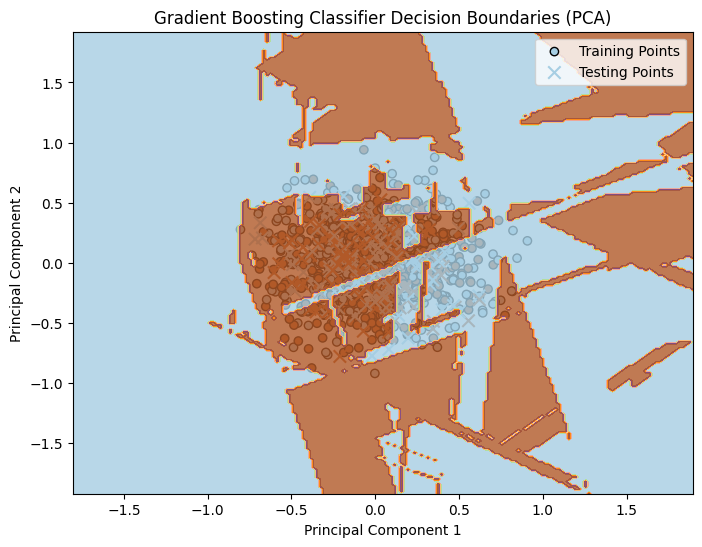

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.decomposition import PCA

# Generate or load your dataset
# For example, using random data for demonstration purposes:
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(0, 2, 1000)  # Binary labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model on the training data
gbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

# Reduce feature space to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot decision boundaries in 2D
plt.figure(figsize=(8, 6))

# Plot training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', label="Training Points")
# Plot testing points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', s=80, label="Testing Points")

# Create a meshgrid to plot decision boundaries
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use PCA-transformed data to get decision boundaries
Z = gbm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Plot decision boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gradient Boosting Classifier Decision Boundaries (PCA)')
plt.legend()
plt.show()


The training points are represented by colored dots, and the testing points are represented by "x" marks. The decision boundaries are shown as colored regions. Keep in mind that this visualization is only possible due to the dimensionality reduction using PCA, and the actual decision boundaries exist in the original 10-dimensional space.

## Naive Bayes:
A simple probabilistic classifier that works well with text-based medical imaging data or when features are assumed to be conditionally independent.


Accuracy: 1.0


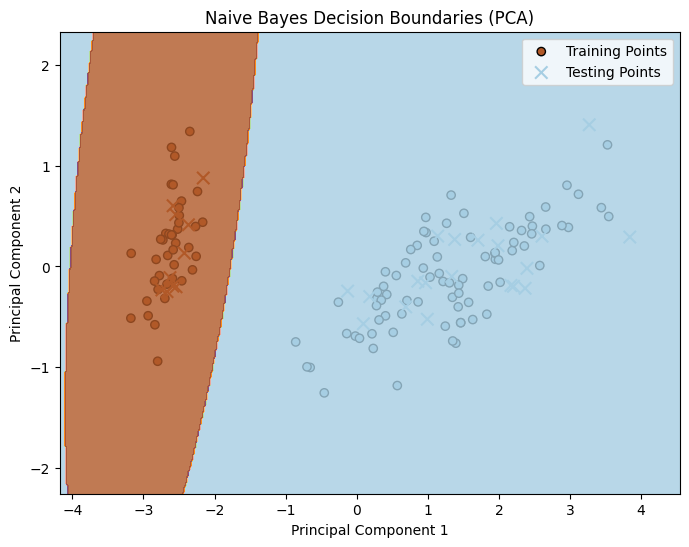

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load the Iris dataset (binary classification)
data = load_iris()
X, y = data.data, data.target
y_binary = [1 if label == 0 else 0 for label in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Define the Naive Bayes model (Gaussian Naive Bayes for continuous features)
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Reduce feature space to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot decision boundaries in 2D
plt.figure(figsize=(8, 6))

# Plot training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', label="Training Points")
# Plot testing points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', s=80, label="Testing Points")

# Create a meshgrid to plot decision boundaries
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use PCA-transformed data to get decision boundaries
Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Plot decision boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Naive Bayes Decision Boundaries (PCA)')
plt.legend()
plt.show()


## K-Nearest Neighbors (KNN):
A non-parametric algorithm that can be effective when there's a small dataset.





Accuracy: 0.905


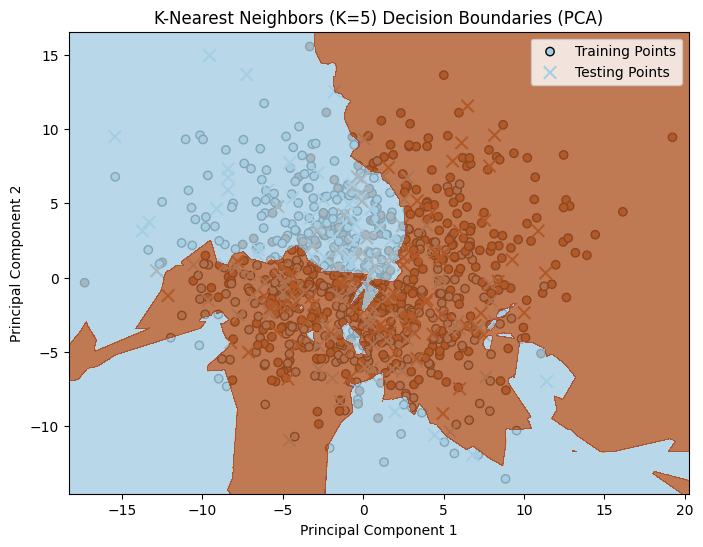

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN classifier
k = 5
model = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Reduce feature space to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot decision boundaries in 2D
plt.figure(figsize=(8, 6))

# Plot training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', label="Training Points")
# Plot testing points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', s=80, label="Testing Points")

# Create a meshgrid to plot decision boundaries
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use PCA-transformed data to get decision boundaries
Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Plot decision boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Nearest Neighbors (K={k}) Decision Boundaries (PCA)')
plt.legend()
plt.show()


## Decision Trees:
Simple and interpretable models that can be used for both binary and multi-class classification tasks.


Accuracy: 1.0


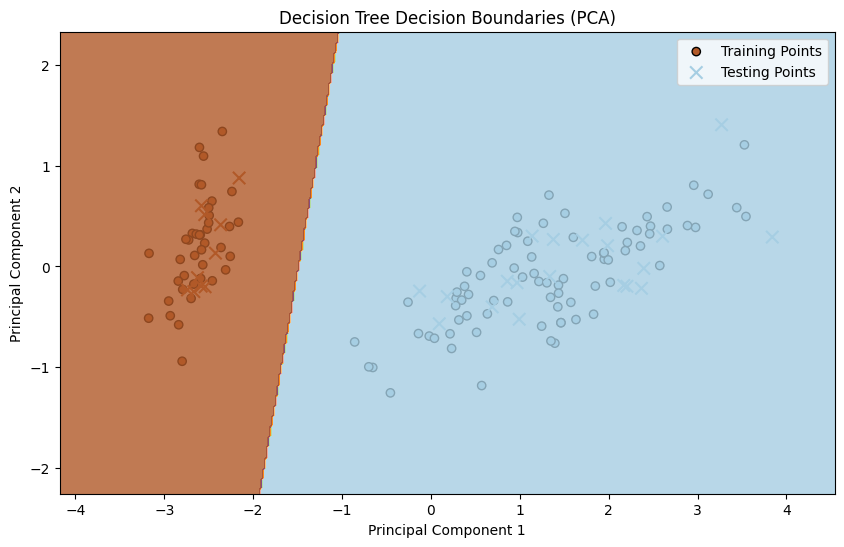

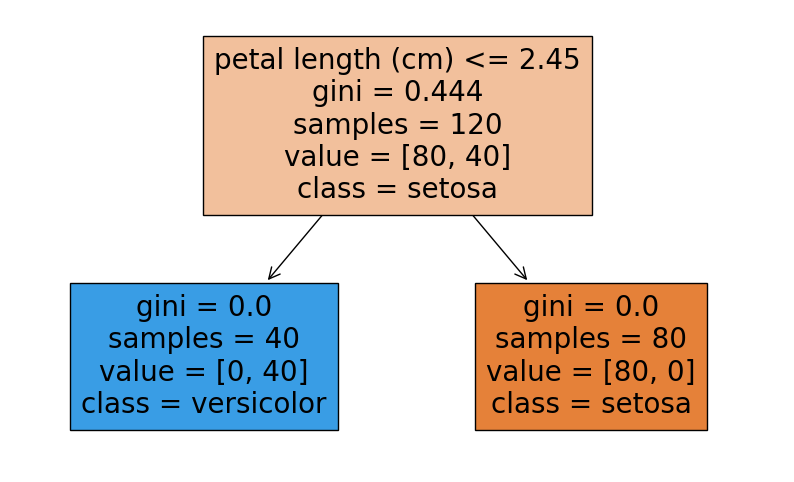

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load the Iris dataset (binary classification)
data = load_iris()
X, y = data.data, data.target
y_binary = [1 if label == 0 else 0 for label in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Define the Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Reduce feature space to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot decision boundaries in 2D
plt.figure(figsize=(10, 6))

# Plot training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', label="Training Points")
# Plot testing points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', s=80, label="Testing Points")

# Create a meshgrid to plot decision boundaries
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use PCA-transformed data to get decision boundaries
Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Plot decision boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Tree Decision Boundaries (PCA)')
plt.legend()

# Plot the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


## Neural Networks
Deep learning models can be used for more complex problems, but they might require a larger dataset and more computational resources.


The decision regions are represented by colored regions, and the training and testing points are shown as scatter plots. The boundary between the two regions shows where the model is making binary classification decisions

7/7 [==============================] - 0s 2ms/step
Accuracy: 0.98
113/113 [==============================] - 0s 1ms/step


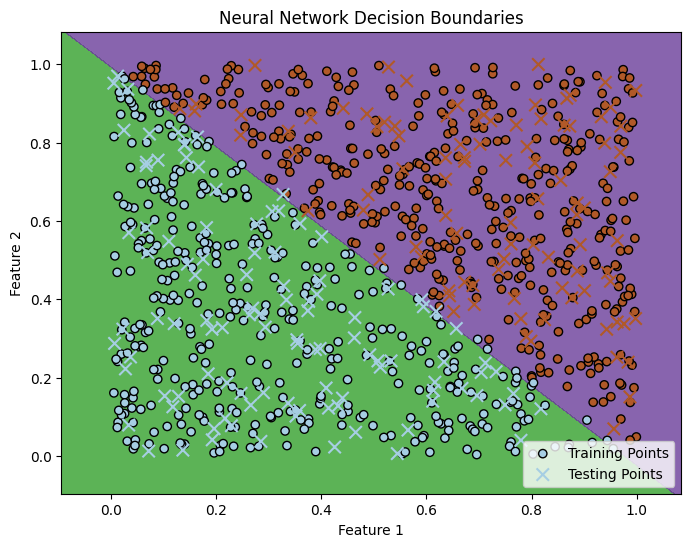

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models impo atrt Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data for binary classification
np.random.seed(42)
X = np.random.rand(1000, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # Hidden layer with 4 neurons
model.add(Dense(1, activation='sigmoid'))          # Output layer with 1 neuron (sigmoid activation for binary classification)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test data (probabilities)
y_prob = model.predict(X_test).flatten()

# Convert probabilities to binary class predictions (using a threshold of 0.5)
y_pred = (y_prob >= 0.5).astype(int)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision boundaries
h = .02
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a meshgrid of points for predictions
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict probabilities for each point in the meshgrid
Z = model.predict(grid_points).flatten()

# Reshape predictions back to a 2D array for contourf
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.Paired, alpha=0.8)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', label="Training Points")
# Plot testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', s=80, label="Testing Points")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Neural Network Decision Boundaries')
plt.legend()
plt.show()
